In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/credit-score-classification-dataset/Credit Score Classification Dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-score-classification-dataset/Credit Score Classification Dataset.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [3]:
df.shape

(164, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [5]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [6]:
print(df.apply(lambda col: col.unique()))

Age                   [25, 30, 35, 40, 45, 50, 26, 31, 36, 41, 46, 5...
Gender                                                   [Female, Male]
Income                [50000, 100000, 75000, 125000, 150000, 40000, ...
Education             [Bachelor's Degree, Master's Degree, Doctorate...
Marital Status                                        [Single, Married]
Number of Children                                         [0, 2, 1, 3]
Home Ownership                                          [Rented, Owned]
Credit Score                                       [High, Average, Low]
dtype: object


In [7]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [8]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [10]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Education'] = df['Education'].map({'High School Diploma': 0, "Associate's Degree": 1, "Bachelor's Degree": 2, "Master's Degree": 3, 'Doctorate': 4})
df['Marital Status'] = df['Marital Status'].map({'Single': 0, 'Married': 1})
df['Home Ownership'] = df['Home Ownership'].map({'Rented': 0, 'Owned': 1})
df['Credit Score'] = df['Credit Score'].map({'Low': 0, 'Average': 1, 'High': 2})

In [11]:
df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['Home Ownership'] = df['Home Ownership'].astype('category')
df['Credit Score'] = df['Credit Score'].astype('category')

In [12]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,1,50000,2,0,0,0,2
1,30,0,100000,3,1,2,1,2
2,35,1,75000,4,1,1,1,2
3,40,0,125000,0,0,0,1,2
4,45,1,100000,2,1,3,1,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 164 non-null    int64   
 1   Gender              164 non-null    category
 2   Income              164 non-null    int64   
 3   Education           164 non-null    category
 4   Marital Status      164 non-null    category
 5   Number of Children  164 non-null    int64   
 6   Home Ownership      164 non-null    category
 7   Credit Score        164 non-null    category
dtypes: category(5), int64(3)
memory usage: 5.5 KB


In [14]:
df.select_dtypes(include='category').describe()

,Gender,Education,Marital Status,Home Ownership,Credit Score
count,164,164,164,164,164
unique,2,5,2,2,3
top,1,2,1,1,2
freq,86,42,87,111,113


The most common archetype: Women, Bachelor, Married, Home owner, Average credit

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)
ctree = DecisionTreeClassifier()
ctree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = ctree.predict(X_test)

[Text(0.6666666666666666, 0.9166666666666666, 'Home Ownership <= 0.5\ngini = 0.442\nsamples = 114\nvalue = [8, 25, 81]'),
 Text(0.5, 0.75, 'Income <= 38750.0\ngini = 0.434\nsamples = 35\nvalue = [8, 25, 2]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'Education <= 3.0\ngini = 0.137\nsamples = 27\nvalue = [0, 25, 2]'),
 Text(0.5, 0.4166666666666667, 'Age <= 25.5\ngini = 0.074\nsamples = 26\nvalue = [0, 25, 1]'),
 Text(0.3333333333333333, 0.25, 'Income <= 53750.0\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.6666666666666666, 0.25, 'gini = 0.0\nsamples = 20\nvalue = [0, 20, 0]'),
 Text(0.8333333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8333333333333334, 0.75, 'gini = 

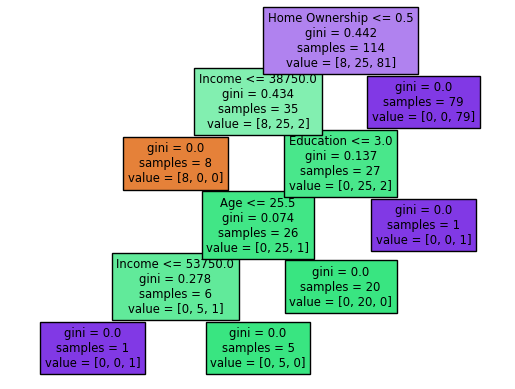

In [18]:
from sklearn import tree
features = ['Age','Gender','Income','Education','Marital Status','Number of Children','Home Ownership']

tree.plot_tree(ctree, feature_names=features, filled = True)

If a person don't have a home, the decision tree goes to the left. For the fist decision, there were 114 samples left, in which 8 people have a Low credit, 25 have average credit and 81 have high credit. 

To the right we have 79 samples with high credit, and all of those have a home. To the left, the branch will divide by an income lower than 38750, so the 8 low income people that have low credit will go to the left and higher income will go to the right. 

In this branch, we have people with income lower than 85000 going to the left, and the rest going to the right, which is just one person with high credit score. To the left there are 25 people with average credit and 1 with high credit.

Now the branch divides by age, so there are 20 people older than 25,5 y.o. going to the right, and they all have average score credit. In the left there are 6 young persons with average or high score.

Conclusions:
All the low credit score persons are low income people that are older than 25.
The better the income, the better the score.
If a person has a home or is young, the better the probability of having an average or high score.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.82      0.82      0.82        11
           2       0.94      0.94      0.94        32

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [21]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
credit_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, credit_preds))

0.0728


In [22]:
credit_preds

array([1.03, 2.  , 1.81, 1.99, 2.  , 1.03, 2.  , 2.  , 2.  , 2.  , 1.02,
       0.  , 2.  , 2.  , 0.  , 2.  , 1.18, 0.02, 2.  , 2.  , 2.  , 0.  ,
       0.  , 2.  , 2.  , 2.  , 2.  , 2.  , 1.32, 1.  , 2.  , 2.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 1.  , 2.  , 0.  , 1.8 , 1.02, 0.  , 1.02,
       1.94, 1.02, 2.  , 2.  , 2.  , 1.02])

In [23]:
rfc = RandomForestClassifier(n_estimators = 300, random_state = 1)
forest = rfc.fit(X_train, y_train)

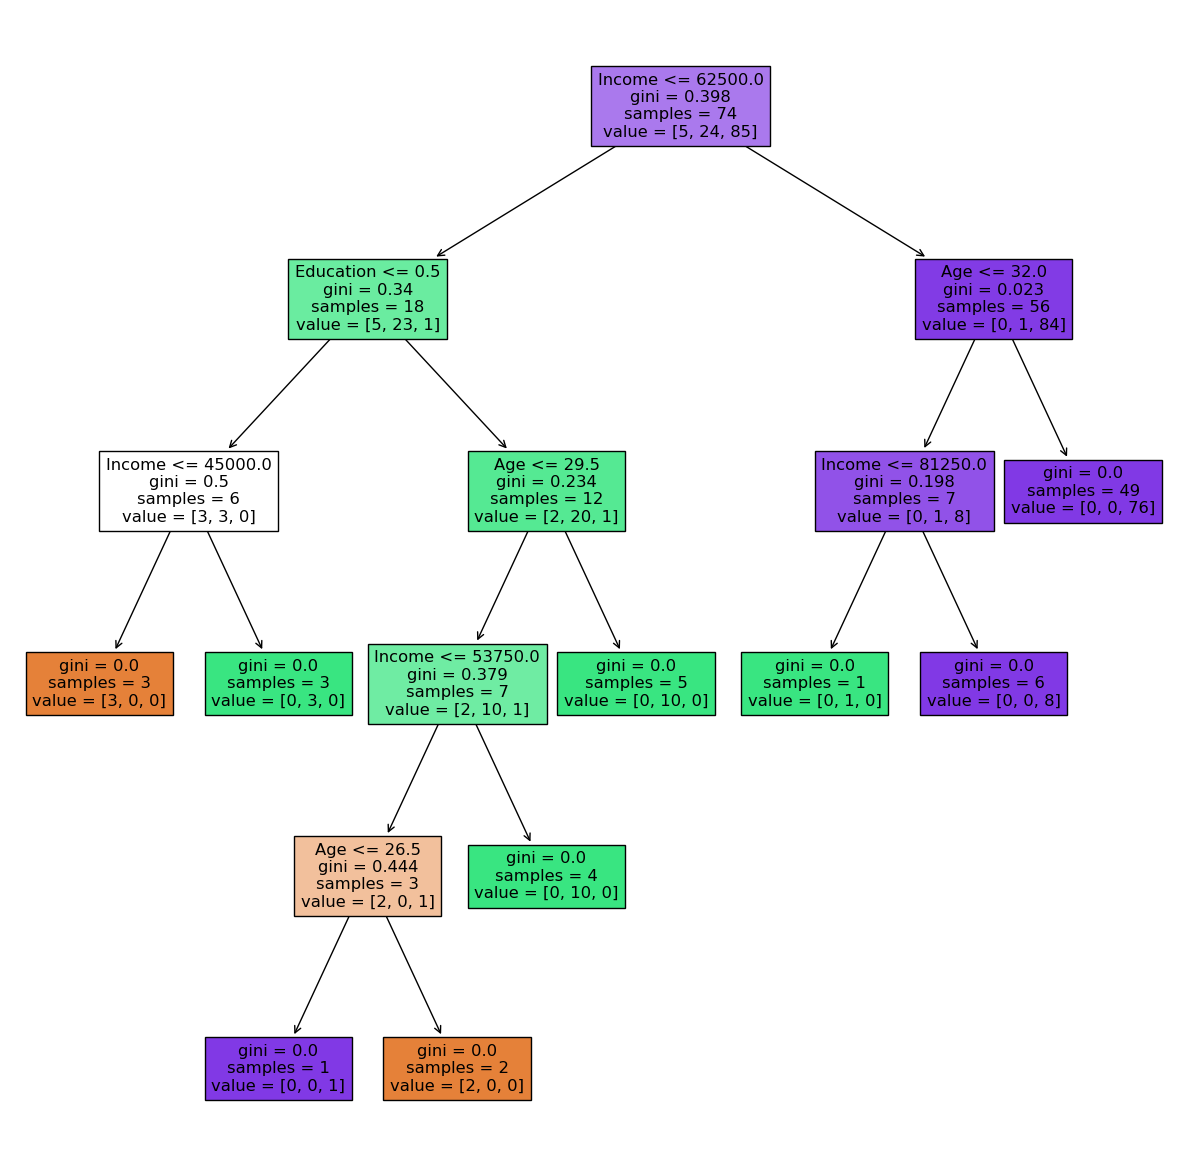

In [24]:
plt.figure(figsize=(15,15))
for i in range(len(rfc.estimators_)):
    tree.plot_tree(rfc.estimators_[i], feature_names=features, filled = True)

This model is more complex because it's like a combination of multiple decision trees in one result. We can see as well that the predictions from this model is very different than the decision tree, because here we have also branches for education and more divisions for income.